# **Exploratory Data Analysis of Nov 2015 liquor sales in Iowa, USA**

![](https://imgur.com/R10FsDE.jpeg)

**What is Exploratory Data Analysis?**

Exploratory data analysis (EDA for short) is what data analysts do with large sets of data, looking for patterns and summarizing the dataset’s main characteristics beyond what they learn from modeling and hypothesis testing. EDA is a philosophy that allows data analysts to approach a database without assumptions. When a data analyst employs EDA, it’s like they’re asking the data to tell them what they don’t know. 

## **Outline of Project**

* **Select and download real-world dataset**
* **Import and Install all the libraries**
* **Perform data preparation & cleaning**
* **Ask & answer questions about the data**
* **Perform exploratory analysis & visualization**
* **Summarize your inferences & write a conclusion**


## **Select and download real-world dataset**

This dataset is available on Kaggle.It contains data about the Liquor sales , in November 2015, in Iowa State of USA.It contains columns, mentioning the category of liquor sold, counties selling the liquor, the state price and the price after inclusion of the state margin and the volume sold of liquor on daily basis.
We will analyze this dataset and draw some conclusions.

Dataset link - https://www.kaggle.com/datasets/residentmario/iowa-liquor-sales?select=Iowa_Liquor_Sales.csv

Let's download the data into the colab notebook. We'll use the **opendatasets library** from Jovian. Let's install and import it, and use the download method.

Use the "Run" button to execute the code.

# Step1 - Importing necessary Libraries

## Downloading the Dataset and libraries

In [3]:
!pip install opendatasets --upgrade --quiet
!pip install jovian --upgrade --quiet
!pip install plotly --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
##Importing the Libraries that we will use in the project to clean, process and visualize the information

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [5]:
import jovian
jovian.commit(project="Iowa liquor sales")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [6]:
import opendatasets as od

#  Step 2: Data Loading from web

## Downloading the dataset Liquor sales of November 2015 of Iowa state of USA

In [7]:
sales_url = 'https://www.kaggle.com/datasets/residentmario/iowa-liquor-sales?select=Iowa_Liquor_Sales.csv'
od.download(sales_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vaibhavmalik2795
Your Kaggle Key: ··········


100%|██████████| 731M/731M [00:09<00:00, 83.8MB/s]


## Loading the dataset into the sales_df

In [8]:
##As the dataset is large we will use first 150000 rows to be loaded and make that a sample of the original dataset

!ls -lh iowa-liquor-sales
sales_csv ='iowa-liquor-sales/Iowa_Liquor_Sales.csv'

total 3.3G
-rw-r--r-- 1 root root 3.3G Mar 22 10:29 Iowa_Liquor_Sales.csv


## Using the nrows() to load limited number of rows

In [9]:
sales_df = pd.read_csv(sales_csv, nrows = 150000)

In [10]:
sales_df

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,S26519700057,06/30/2015,4819,Super Stop 2 / Altoona,2635 ADVENTURELAND DR,ALTOONA,50009,2635 ADVENTURELAND DR\nALTOONA 50009\n(41.6585...,77.0,Polk,...,89191,Jose Cuervo Especial Reposado Tequila Mini,12,500,$11.50,$17.25,2,$34.50,1.00,0.26
149996,S19539400022,06/16/2014,3612,B and C Liquor / Maquoketa,509 E PLATT,MAQUOKETA,52060,"509 E PLATT\nMAQUOKETA 52060\n(42.069219, -90....",49.0,Jackson,...,35926,Five O'clock PET Vodka,12,750,$3.37,$5.06,12,$60.72,9.00,2.38
149997,S20742900003,08/19/2014,2963,Dahl's / Clive,15500 HICKMAN,CLIVE,50325,"15500 HICKMAN\nCLIVE 50325\n(41.614714, -93.83...",77.0,Polk,...,43336,Captain Morgan Original Spiced,12,750,$9.00,$13.50,12,$162.00,9.00,2.38
149998,S03841300004,01/31/2012,3808,Thriftway,300 4TH ST,LA PORTE CITY,50651,"300 4TH ST\nLA PORTE CITY 50651\n(42.316243, -...",7.0,Black Hawk,...,35917,Five O'clock Vodka,12,1000,$4.01,$6.01,12,$72.12,12.00,3.17


The above dataset contains 150000 rows and 24 columns as intended

## Lets check the description using .info() method

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Invoice/Item Number    150000 non-null  object 
 1   Date                   150000 non-null  object 
 2   Store Number           150000 non-null  int64  
 3   Store Name             150000 non-null  object 
 4   Address                150000 non-null  object 
 5   City                   150000 non-null  object 
 6   Zip Code               150000 non-null  object 
 7   Store Location         150000 non-null  object 
 8   County Number          149827 non-null  float64
 9   County                 149827 non-null  object 
 10  Category               149882 non-null  float64
 11  Category Name          149844 non-null  object 
 12  Vendor Number          150000 non-null  int64  
 13  Vendor Name            150000 non-null  object 
 14  Item Number            150000 non-nu

The above table gives us the information about the following
* Range Index : 0-149999
* Rows : 150000
* Columns : 24
* Datatypes: Int, Float, Object
and the Number of values in each columns


# Step 3: Data Cleaning

In [12]:
##Creating a copy inform of a sample of this dataset to work upon

sales_df_sample = sales_df.head(150000)
sales_df_sample

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,S26519700057,06/30/2015,4819,Super Stop 2 / Altoona,2635 ADVENTURELAND DR,ALTOONA,50009,2635 ADVENTURELAND DR\nALTOONA 50009\n(41.6585...,77.0,Polk,...,89191,Jose Cuervo Especial Reposado Tequila Mini,12,500,$11.50,$17.25,2,$34.50,1.00,0.26
149996,S19539400022,06/16/2014,3612,B and C Liquor / Maquoketa,509 E PLATT,MAQUOKETA,52060,"509 E PLATT\nMAQUOKETA 52060\n(42.069219, -90....",49.0,Jackson,...,35926,Five O'clock PET Vodka,12,750,$3.37,$5.06,12,$60.72,9.00,2.38
149997,S20742900003,08/19/2014,2963,Dahl's / Clive,15500 HICKMAN,CLIVE,50325,"15500 HICKMAN\nCLIVE 50325\n(41.614714, -93.83...",77.0,Polk,...,43336,Captain Morgan Original Spiced,12,750,$9.00,$13.50,12,$162.00,9.00,2.38
149998,S03841300004,01/31/2012,3808,Thriftway,300 4TH ST,LA PORTE CITY,50651,"300 4TH ST\nLA PORTE CITY 50651\n(42.316243, -...",7.0,Black Hawk,...,35917,Five O'clock Vodka,12,1000,$4.01,$6.01,12,$72.12,12.00,3.17


## Selecting columns of our use which will make our datframe lighter

In [13]:
selected_cols = ['Date','Store Number','Store Name','City','Zip Code','County Number','County','Category','Category Name','Vendor Number','Item Number','Pack','Bottle Volume (ml)','State Bottle Cost','State Bottle Retail','Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)']

In [14]:
##checking the dataframe
sample2_df = pd.read_csv(sales_csv, nrows=150000,usecols= selected_cols)
sample2_df

,Date,Store Number,Store Name,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/20/2015,2191,Keokuk Spirits,KEOKUK,52632,56.0,Lee,NaN,NaN,255,297,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,11/21/2015,2205,Ding's Honk And Holler,CLARINDA,51632,73.0,Page,NaN,NaN,255,297,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,11/16/2015,3549,Quicker Liquor Store,FORT MADISON,52627,56.0,Lee,NaN,NaN,130,249,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,IOWA CITY,52240,52.0,Johnson,NaN,NaN,65,237,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,11/17/2015,3942,Twin Town Liquor,TOLEDO,52342,86.0,Tama,NaN,NaN,130,249,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,06/30/2015,4819,Super Stop 2 / Altoona,ALTOONA,50009,77.0,Polk,1022100.0,TEQUILA,395,89191,12,500,$11.50,$17.25,2,$34.50,1.00,0.26
149996,06/16/2014,3612,B and C Liquor / Maquoketa,MAQUOKETA,52060,49.0,Jackson,1031080.0,VODKA 80 PROOF,297,35926,12,750,$3.37,$5.06,12,$60.72,9.00,2.38
149997,08/19/2014,2963,Dahl's / Clive,CLIVE,50325,77.0,Polk,1062310.0,SPICED RUM,260,43336,12,750,$9.00,$13.50,12,$162.00,9.00,2.38
149998,01/31/2012,3808,Thriftway,LA PORTE CITY,50651,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,297,35917,12,1000,$4.01,$6.01,12,$72.12,12.00,3.17


## Printing Cpu runtime while loading first 150000 rows

In [15]:
%%time
pd.read_csv(sales_csv,nrows=150000)
time1 =print('%%time')

%%time
CPU times: user 999 ms, sys: 77.2 ms, total: 1.08 s
Wall time: 1.07 s


## printing Cpu runtime while loading selected columns of dataset

In [16]:
%%time
sample2_df
time2 =print('%%time')

%%time
CPU times: user 53 µs, sys: 17 µs, total: 70 µs
Wall time: 76.5 µs


We can see the difference in terms of wall time taken by using selected columns which makes it approximately 1000times faster then loading full Dataframe


## Transforming the Columns of the Dataset


In [17]:
#Creating a copy of our dataset and then we will use it

sample3_df = sample2_df.copy()

## Stripping the dollar sign from the columns

In [18]:
 #'Sale (Dollars)' column
sample3_df['Sale (Dollars)'].apply(lambda x: x.strip('$'))

#To make it work we need to reassign it to our dataframe column
sample3_df['Sale (Dollars)']= [x.strip('$') for x in sample3_df['Sale (Dollars)']]

In [19]:
#State Bottle Retail column

sample3_df['State Bottle Retail'].apply(lambda x: x.strip('$'))
sample3_df['State Bottle Retail']= [x.strip('$') for x in sample3_df['State Bottle Retail']]

In [20]:
#State Bottle Cost column

sample3_df['State Bottle Cost'].apply(lambda x: x.strip('$'))
sample3_df['State Bottle Cost']= [x.strip('$') for x in sample3_df['State Bottle Cost']]

In [21]:
#lets check the dataframe after stripping the $sign

sample3_df.head(10)

,Date,Store Number,Store Name,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/20/2015,2191,Keokuk Spirits,KEOKUK,52632,56.0,Lee,NaN,NaN,255,297,6,750,18.09,27.14,6,162.84,4.50,1.19
1,11/21/2015,2205,Ding's Honk And Holler,CLARINDA,51632,73.0,Page,NaN,NaN,255,297,6,750,18.09,27.14,12,325.68,9.00,2.38
2,11/16/2015,3549,Quicker Liquor Store,FORT MADISON,52627,56.0,Lee,NaN,NaN,130,249,20,150,6.40,9.60,2,19.20,0.30,0.08
3,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,IOWA CITY,52240,52.0,Johnson,NaN,NaN,65,237,3,1750,35.55,53.34,3,160.02,5.25,1.39
4,11/17/2015,3942,Twin Town Liquor,TOLEDO,52342,86.0,Tama,NaN,NaN,130,249,20,150,6.40,9.60,2,19.20,0.30,0.08
5,11/11/2015,3650,"Spirits, Stogies and Stuff",HOLSTEIN,51025,47.0,Ida,NaN,NaN,65,237,3,1750,35.55,53.34,1,53.34,1.75,0.46
6,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,WATERLOO,50702,7.0,Black Hawk,1701100.0,DECANTERS & SPECIALTY PACKAGES,962,238,6,1500,11.62,17.43,6,104.58,9.00,2.38
7,11/10/2015,3942,Twin Town Liquor,TOLEDO,52342,86.0,Tama,NaN,NaN,65,237,3,1750,35.55,53.34,2,106.68,3.50,0.92
8,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,MUSCATINE,52761,70.0,Muscatine,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,12,750,19.58,29.37,4,117.48,3.00,0.79
9,11/16/2015,4307,Crossroads Wine and Liquor,DUNLAP,712-2,43.0,Harrison,NaN,NaN,130,249,20,150,6.40,9.60,2,19.20,0.30,0.08


Now as we stripped the $sign , we will be changing the category of these column to Float from Object, using .astype()method on each one of them

## Using .astype()to chnage the dtype from object to float

In [22]:
sample3_df['Sale (Dollars)'] = sample3_df['Sale (Dollars)'].astype(float)
sample3_df['State Bottle Retail'] = sample3_df['State Bottle Retail'].astype(float)
sample3_df['State Bottle Cost'] = sample3_df['State Bottle Cost'].astype(float)

In [23]:
#lets check the description of our dataframe now using the .info()method

sample3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   150000 non-null  object 
 1   Store Number           150000 non-null  int64  
 2   Store Name             150000 non-null  object 
 3   City                   150000 non-null  object 
 4   Zip Code               150000 non-null  object 
 5   County Number          149827 non-null  float64
 6   County                 149827 non-null  object 
 7   Category               149882 non-null  float64
 8   Category Name          149844 non-null  object 
 9   Vendor Number          150000 non-null  int64  
 10  Item Number            150000 non-null  int64  
 11  Pack                   150000 non-null  int64  
 12  Bottle Volume (ml)     150000 non-null  int64  
 13  State Bottle Cost      150000 non-null  float64
 14  State Bottle Retail    150000 non-nu

# Step 4: Finding null values, filling them using ffill, .isna(), .fillna() methods

## Finding Null values in the dataset

In [24]:
sample3_df.isna().sum()

Date                       0
Store Number               0
Store Name                 0
City                       0
Zip Code                   0
County Number            173
County                   173
Category                 118
Category Name            156
Vendor Number              0
Item Number                0
Pack                       0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

## Finding total null values in the dataframe(sample2_df)

In [25]:
x=sample3_df['County Number'].isna().sum()
y=sample3_df['County'].isna().sum()
z=sample3_df['Category'].isna().sum()
z1=sample3_df['Category Name'].isna().sum()
total_null_values = x+y+z+z1
total_null_values

620

**So our dataset has in total 620 Null Values distributed amongst 4 Columns**

## plotting the null Values amongst all columns

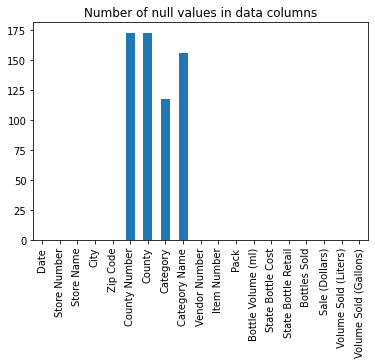

In [26]:
null_values = sample3_df.isna().sum()
null_values
null_values.plot.bar(x= 'null_values',title = 'Number of null values in data columns');

The above graph shows that the columns County number, County, Category, Category Name has approximately equal missing values.

## Replace the missing values

We will now replace the missing values in our dataframe using fillna() function of pandas

In [27]:
#Now we have seen earlier that our dataframe has some missing values in it, lets revisit and fill those values under the County Number, County , Category and Category Name column

sample3_df['County'].fillna(method = 'ffill', inplace = True)

#Using mode value for county number

county_number_mode = sample3_df['County Number'].mode()[0]
county_number_mode
sample3_df['County Number'].fillna(county_number_mode, inplace = True)

#For the category we can use the mean as measure to replace the missing values
category_mean = sample3_df.Category.mean()
category_mean
sample3_df.Category.fillna(category_mean, inplace = True)

#Using ffill method to fill out the values 

missing_cat = sample3_df['Category Name'].mode()
missing_cat
sample3_df['Category Name'].fillna(missing_cat, inplace = True)
sample3_df['Category Name'].fillna(method = 'ffill', inplace = True)



In [28]:
#lets check the dataframe again for the missing values if there are any
sample3_df.isna().sum()


Date                     0
Store Number             0
Store Name               0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

we have removed all the null values from our dataset and filled them using the corresponding values

## Finding the central tendencies of our dataset sample and the plotting some of the columns using the measures as columns and plotly library

## Finding central tendencies using the .describe() method

In [29]:
sample3_df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3491.842593,57.148593,1.044431e+06,255.891380,45532.012547,12.154413,932.817387,9.452134,14.208203,9.667373,125.107252,8.927663,2.358602
std,867.606934,27.230372,5.016274e+04,143.113396,49653.797330,7.340645,478.622195,6.691765,10.037589,24.239308,427.446083,27.887354,7.367045
min,2106.000000,1.000000,1.011100e+06,10.000000,173.000000,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.030000
25%,2601.000000,31.000000,1.012210e+06,115.000000,27056.000000,6.000000,750.000000,5.480000,8.250000,3.000000,30.360000,1.750000,0.460000
50%,3651.000000,62.000000,1.032080e+06,260.000000,38176.000000,12.000000,750.000000,7.870000,11.820000,6.000000,68.960000,5.250000,1.390000
75%,4196.000000,77.000000,1.062310e+06,380.000000,59161.000000,12.000000,1000.000000,11.540000,17.310000,12.000000,133.560000,10.500000,2.770000
max,9018.000000,99.000000,1.701100e+06,978.000000,994200.000000,336.000000,6000.000000,563.400000,845.100000,3600.000000,70164.000000,2700.000000,713.260000


In [30]:
#adding a new column of Measures so that we can show it as a label
measures_df = pd.DataFrame(sample3_df.describe())
Measures = ['Count', 'Average', 'Std_dev','Minimum','Q1','Q2','Q3','Maximum']

In [31]:
measures_df['Central Tendencies'] = Measures
measures_df

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Central Tendencies
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,Count
mean,3491.842593,57.148593,1.044431e+06,255.891380,45532.012547,12.154413,932.817387,9.452134,14.208203,9.667373,125.107252,8.927663,2.358602,Average
std,867.606934,27.230372,5.016274e+04,143.113396,49653.797330,7.340645,478.622195,6.691765,10.037589,24.239308,427.446083,27.887354,7.367045,Std_dev
min,2106.000000,1.000000,1.011100e+06,10.000000,173.000000,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.030000,Minimum
25%,2601.000000,31.000000,1.012210e+06,115.000000,27056.000000,6.000000,750.000000,5.480000,8.250000,3.000000,30.360000,1.750000,0.460000,Q1
50%,3651.000000,62.000000,1.032080e+06,260.000000,38176.000000,12.000000,750.000000,7.870000,11.820000,6.000000,68.960000,5.250000,1.390000,Q2
75%,4196.000000,77.000000,1.062310e+06,380.000000,59161.000000,12.000000,1000.000000,11.540000,17.310000,12.000000,133.560000,10.500000,2.770000,Q3
max,9018.000000,99.000000,1.701100e+06,978.000000,994200.000000,336.000000,6000.000000,563.400000,845.100000,3600.000000,70164.000000,2700.000000,713.260000,Maximum


In the above dataframe we added a new column as count to show the central tendencies of each column

## Plotting the Central Tendencies of our Dataframe

In [32]:
!pip install seaborn --upgrade --quiet

## What is the central tendency for Store Number column?

In [33]:
fig = px.pie(measures_df,
             title ='Measures of Central Tendency for Store Number Column',
              values = 'Store Number',
             names = 'Central Tendencies');
fig.show()

The above graph represents the distribution of the central tendencies in percentages of the area of a circle.

## Explain the Central Tendency for Item Number column?

In [34]:
fig = px.bar(measures_df,
             title= 'Central Tendencies for Item Number Column',
             x='Central Tendencies',
             y= 'Item Number')
fig.show()

The above graph shows that the average, std_dev, q1, q2,q3 are of similar range but the Maximum is of a Million and there were days where there was 0 sales

## Plot the Central tendency for State Bottle Retail

In [35]:
fig = px.line(measures_df,
              title='Statistical Measure for State Bottle Retail',
              y= 'State Bottle Retail',
              x='Central Tendencies')
fig.show()

We can see that while plotting the values , the values of this column are declining in a way , if we can find the slope of the line we can see tha from count to Maximum, the values are declining.

## Plotting the Bottle Volume (ml) column

In [36]:
fig = px.violin(measures_df,
                title = ' CEntral tendencies for the Bottle Volume (ml) column',
             y = 'Bottle Volume (ml)');
fig.show()

We can see that the most of the values of sales lie upto 2000 in the month, except for some outliers

## Plotting Central Tendencies of State Bottle Cost

In [37]:
fig = px.funnel(
    measures_df,
    y= 'Central Tendencies',
    x='State Bottle Cost',
    title ='Central Tendencies of State Bottle Cost'
);
fig.show()

The average bottle retail is 9.45 and maximum is $563.4

# Step5: Analysing , Answering questions.

## Profit margin on a state bottle.

In [38]:
#Profit margin of state on the bottle

sample3_df['State Profit'] = sample3_df['State Bottle Retail']-sample3_df['State Bottle Cost']

In [39]:
#Total Profit on Bottles sold 

sample3_df['Total Profit'] = sample3_df['Bottles Sold'] * sample3_df['State Profit']

Lets check the new columns that we added and did they contain the values we computed or not

In [40]:
sample3_df.head(20)

,Date,Store Number,Store Name,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),State Profit,Total Profit
0,11/20/2015,2191,Keokuk Spirits,KEOKUK,52632,56.0,Lee,1.044431e+06,VODKA 80 PROOF,255,...,6,750,18.09,27.14,6,162.84,4.50,1.19,9.05,54.30
1,11/21/2015,2205,Ding's Honk And Holler,CLARINDA,51632,73.0,Page,1.044431e+06,VODKA 80 PROOF,255,...,6,750,18.09,27.14,12,325.68,9.00,2.38,9.05,108.60
2,11/16/2015,3549,Quicker Liquor Store,FORT MADISON,52627,56.0,Lee,1.044431e+06,VODKA 80 PROOF,130,...,20,150,6.40,9.60,2,19.20,0.30,0.08,3.20,6.40
3,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,IOWA CITY,52240,52.0,Johnson,1.044431e+06,VODKA 80 PROOF,65,...,3,1750,35.55,53.34,3,160.02,5.25,1.39,17.79,53.37
4,11/17/2015,3942,Twin Town Liquor,TOLEDO,52342,86.0,Tama,1.044431e+06,VODKA 80 PROOF,130,...,20,150,6.40,9.60,2,19.20,0.30,0.08,3.20,6.40
5,11/11/2015,3650,"Spirits, Stogies and Stuff",HOLSTEIN,51025,47.0,Ida,1.044431e+06,VODKA 80 PROOF,65,...,3,1750,35.55,53.34,1,53.34,1.75,0.46,17.79,17.79
6,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,WATERLOO,50702,7.0,Black Hawk,1.701100e+06,DECANTERS & SPECIALTY PACKAGES,962,...,6,1500,11.62,17.43,6,104.58,9.00,2.38,5.81,34.86
7,11/10/2015,3942,Twin Town Liquor,TOLEDO,52342,86.0,Tama,1.044431e+06,DECANTERS & SPECIALTY PACKAGES,65,...,3,1750,35.55,53.34,2,106.68,3.50,0.92,17.79,35.58
8,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,MUSCATINE,52761,70.0,Muscatine,1.701100e+06,DECANTERS & SPECIALTY PACKAGES,65,...,12,750,19.58,29.37,4,117.48,3.00,0.79,9.79,39.16
9,11/16/2015,4307,Crossroads Wine and Liquor,DUNLAP,712-2,43.0,Harrison,1.044431e+06,DECANTERS & SPECIALTY PACKAGES,130,...,20,150,6.40,9.60,2,19.20,0.30,0.08,3.20,6.40


## Lets find the total profit earned by the state on the liquor bottles

In [41]:
total_profit = sample3_df['Total Profit'].sum()
total_profit

print("The total profit earned by the government is ${}".format(total_profit))

The total profit earned by the government is $6283855.5200000005


## Average number of bottles sold

In [42]:
average_bottles = sample3_df['Bottles Sold'].mean()
average_bottles 

print("the average number of bottles sold per day in the month of november is {}".format(average_bottles))

the average number of bottles sold per day in the month of november is 9.667373333333334


## Store having the highest and the lowest sale in a day

In [43]:
max_sales = sample3_df['Sale (Dollars)'].max()
max_sales

70164.0

In [44]:
max_sales_store = sample3_df.loc[sample3_df['Sale (Dollars)']== max_sales, 'Store Name']
max_sales_store

print("the store {} recorded maximum sales of {}$".format(max_sales_store, max_sales))

the store 110969    Costco Wholesale #788
Name: Store Name, dtype: object recorded maximum sales of 70164.0$


The store Costco Wholesale has the highest sales of 70164 $ in a day

## Minimun sales in a day

In [45]:
min_sales = sample3_df['Sale (Dollars)'].min()
min_sales

0.0

In [46]:
#finding the stores that has the lowest sales in a day

min_sales_store = sample3_df.loc[sample3_df['Sale (Dollars)']== min_sales, 'Store Name']
print("the following stores recorded lowest or no sales at all in a day")
min_sales_store

the following stores recorded lowest or no sales at all in a day


230             Fareway Stores #703 / Humbolt
4459                                Thriftway
5367            Hy-Vee Wine and Spirits / WDM
16190                Rodgers Spirits and More
17436                Hy-Vee #7 / Cedar Rapids
22117          Sam's Club 8162 / Cedar Rapids
26303      Hy-Vee Drugstore #4 / Cedar Rapids
29478                               Thriftway
31365           Hy-Vee Food Store #1 / Newton
31593                  Armstrong Liquor Store
34361                       After 5 Somewhere
36283                    Karl's Grocery Store
39885            Hy-Vee #3 / BDI / Des Moines
41254                         Hy-Vee #4 / WDM
41591                     Sid's Beverage Shop
46252                    Quicker Liquor Store
48185                          Wilkie Liquors
48275     Hy-Vee / Drugtown #1 / Cedar Rapids
48797                        Big G Food Store
48870       Hy-Vee Drugstore / Council Bluffs
50497          Hy-Vee Food Store / Sioux City
51843             Hy-Vee Food Stor

In [47]:
#we can create a datframe of this and concatenate it with the original dataframe but it will add up some Null Values in the column

low_sales_df = pd.DataFrame(min_sales_store).reset_index()
low_sales_df

,index,Store Name
0,230,Fareway Stores #703 / Humbolt
1,4459,Thriftway
2,5367,Hy-Vee Wine and Spirits / WDM
3,16190,Rodgers Spirits and More
4,17436,Hy-Vee #7 / Cedar Rapids
5,22117,Sam's Club 8162 / Cedar Rapids
6,26303,Hy-Vee Drugstore #4 / Cedar Rapids
7,29478,Thriftway
8,31365,Hy-Vee Food Store #1 / Newton
9,31593,Armstrong Liquor Store


We can see from the above mentioned datframe that the following stores have the lowest sales and Hy-Vee stores constitutes the most number of stores having lowest sales.

## Finding the number of county selling liquor and the number of stores 

In [48]:
county = sample3_df['County'].nunique()
print("The number of counties selling alcohol are {}".format(county))

The number of counties selling alcohol are 99


**The number of counties selling alcohol are 99**

In [49]:
stores = sample3_df['Store Name'].nunique()
print("The number of stores are {}".format(stores))

The number of stores are 1520


**The number of stores selling alcohol in Iowa state are 1520**

In [50]:
print(sample3_df['County'].value_counts())

Polk          27078
Linn          12190
Scott          9473
Black Hawk     7902
Johnson        7600
              ...  
Davis           135
Wayne           135
Decatur         130
Ringgold        105
Fremont          12
Name: County, Length: 99, dtype: int64


**The 'Polk' county has the maximum number of bills or constitutes the sales of liquor in Iowa**

In [51]:
sample3_df['Vendor Number'].value_counts().idxmax()                                                                                                                                                                                                                                                                                                        

260

In [52]:
Vendor = sample3_df.loc[sample3_df['Vendor Number'] == 260, 'Store Name']

In [53]:
Vendor.value_counts()

Hy-Vee #3 / BDI / Des Moines            246
Central City Liquor, Inc.               172
Central City 2                          165
Hy-vee  #2 / Ames                       146
Hy-Vee #3 Food and Drugstore            142
                                       ... 
Casey's General Store #2552 / Goldfi      1
New Star  /  Ansborough Ave               1
Super Stop III / Dubuque                  1
Kimmes Country Store Alta 05              1
CVS Pharmacy #10452  /  Ames              1
Name: Store Name, Length: 1401, dtype: int64

**Hy-Vee stores are the most selling stores of liquor as they have 246 counts of vendors in the distribution stream**

In [54]:
#import seaborn for plotting graphs
import seaborn as sns

In [55]:
#lets again check the data type of our date column and then parse it if required.

sample3_df['Date'].describe()

count         150000
unique           858
top       12/29/2014
freq             339
Name: Date, dtype: object

So it has 858, unique entries but the format is of object type, so lets convert it to the date time format using astype() and datetime() or parsedates()

In [56]:
sample3_df['Date']= pd.to_datetime(sample3_df['Date'])

In [57]:
sample3_df['Day'] = sample3_df['Date'].dt.day
sample3_df['Month'] = sample3_df['Date'].dt.month

In [58]:
sample3_df.head(5)

,Date,Store Number,Store Name,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),State Profit,Total Profit,Day,Month
0,2015-11-20,2191,Keokuk Spirits,KEOKUK,52632,56.0,Lee,1.044431e+06,VODKA 80 PROOF,255,...,18.09,27.14,6,162.84,4.50,1.19,9.05,54.30,20,11
1,2015-11-21,2205,Ding's Honk And Holler,CLARINDA,51632,73.0,Page,1.044431e+06,VODKA 80 PROOF,255,...,18.09,27.14,12,325.68,9.00,2.38,9.05,108.60,21,11
2,2015-11-16,3549,Quicker Liquor Store,FORT MADISON,52627,56.0,Lee,1.044431e+06,VODKA 80 PROOF,130,...,6.40,9.60,2,19.20,0.30,0.08,3.20,6.40,16,11
3,2015-11-04,2513,Hy-Vee Food Store #2 / Iowa City,IOWA CITY,52240,52.0,Johnson,1.044431e+06,VODKA 80 PROOF,65,...,35.55,53.34,3,160.02,5.25,1.39,17.79,53.37,4,11
4,2015-11-17,3942,Twin Town Liquor,TOLEDO,52342,86.0,Tama,1.044431e+06,VODKA 80 PROOF,130,...,6.40,9.60,2,19.20,0.30,0.08,3.20,6.40,17,11


In [59]:
#Lets start the visualization of the dataset starting with the sales of liquor.

In [60]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (14, 8)

## What is the everyday sales of liquor?

In [61]:
everyday_sales = sample3_df['Sale (Dollars)']

In [62]:
date = sample3_df['Day']

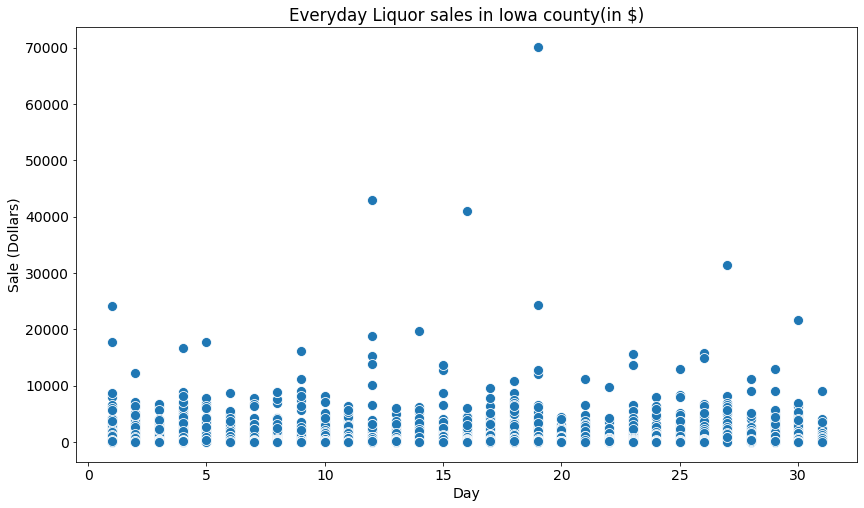

In [63]:
plt.title('Everyday Liquor sales in Iowa county(in $)')
sns.scatterplot(x=date,
                y= everyday_sales,
                s=100);

Observation -From the above plot we can find out that the sales figure mostly in the month of November is below 10000$ on a day.

Also we can make it more appealing by taking count of some limited values in our graph and adding hues to it.

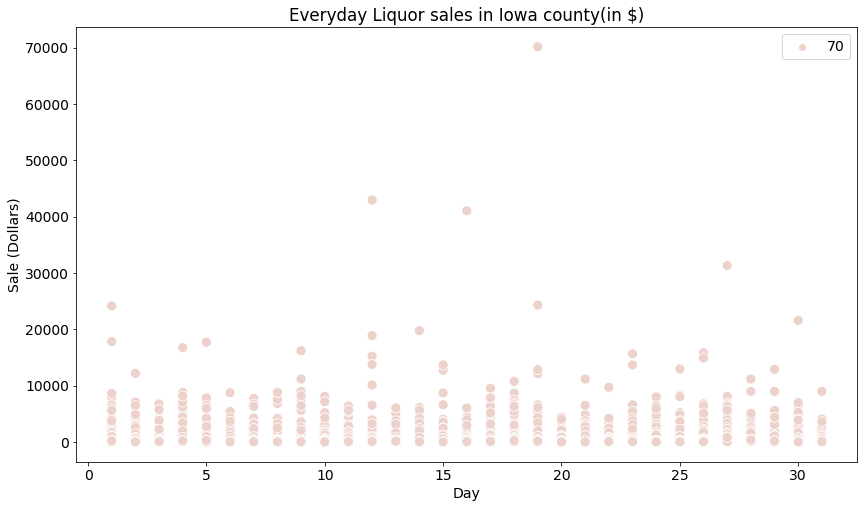

In [64]:
plt.title('Everyday Liquor sales in Iowa county(in $)')
sns.scatterplot(x=date,
                y= everyday_sales,
                hue= sample3_df['Category Name'].nunique(),
                s=100);

In [65]:
unique_cat = sample3_df['Category Name'].unique()
unique_cat

array(['VODKA 80 PROOF', 'DECANTERS & SPECIALTY PACKAGES',
       'CREAM LIQUEURS', 'MISC. IMPORTED CORDIALS & LIQUEURS',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'FLAVORED RUM',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED',
       'MISC. AMERICAN CORDIALS & LIQUEURS', 'TEQUILA', 'IRISH WHISKIES',
       'WHISKEY LIQUEUR', 'AMERICAN DRY GINS', 'CANADIAN WHISKIES',
       'IMPORTED DRY GINS', 'BLENDED WHISKIES', 'SINGLE MALT SCOTCH',
       'SPICED RUM', 'STRAIGHT BOURBON WHISKIES', 'IMPORTED VODKA - MISC',
       'IMPORTED VODKA', 'AMERICAN COCKTAILS', '100 PROOF VODKA',
       'TENNESSEE WHISKIES', 'IMPORTED GRAPE BRANDIES', 'SCOTCH WHISKIES',
       'AMERICAN ALCOHOL', 'FLAVORED GINS', 'IMPORTED SCHNAPPS',
       'APPLE SCHNAPPS', 'BLACKBERRY BRANDIES', 'APRICOT BRANDIES',
       'AMERICAN AMARETTO', 'STRAIGHT RYE WHISKIES', 'BARBADOS RUM',
       'WATERMELON SCHNAPPS', 'AMERICAN GRAPE BRANDIES',
       'CHERRY BRANDIES', 'PEACH SCHNAPPS', 'BUTTERSCOTCH SCHNAPPS',
       'MISCELL

Observation - There are 70 different categories of liquor constituting everyday sales in the Iowa state

## What is the Total Profit recorded everyday?

In [66]:
profit_df = sample3_df[['Total Profit','Day']]
df =pd.DataFrame(sample3_df.groupby(sample3_df.Day)['Total Profit'].sum()).reset_index()
df

,Day,Total Profit
0,1,184004.53
1,2,194750.01
2,3,206907.84
3,4,246358.38
4,5,218668.59
5,6,204995.80
6,7,190503.43
7,8,192586.56
8,9,227801.21
9,10,210408.13


In [67]:
fig =px.histogram(df,
                   x= 'Day',
                   y = 'Total Profit',
                   nbins= 60);
fig.update_layout(bargap  = 0.2)
fig.show()

The state profit was maximum on 4th November with 247000(Dollars) as total Profit

## What is the Total Profit of state on first 500 bills?

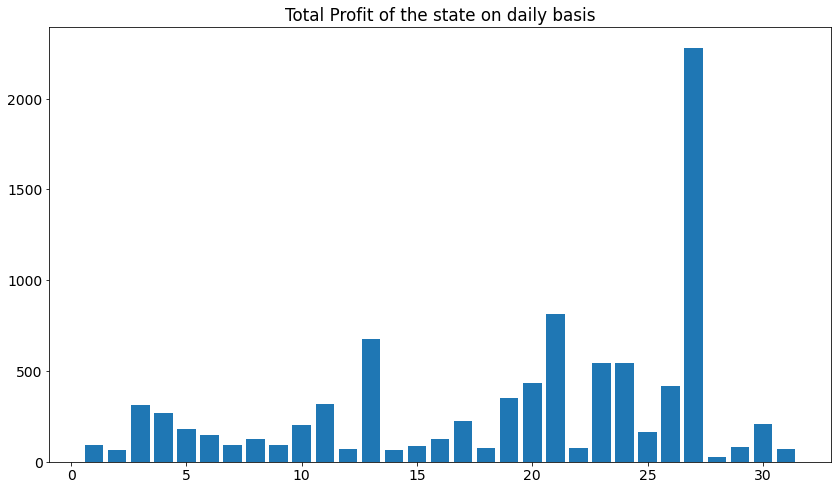

In [68]:
#Total Profit earned by the state for first 500 bills.

plt.bar(sample3_df['Day'].head(500), sample3_df['Total Profit'].head(500));
plt.title('Total Profit of the state on daily basis');
plt.xlabel = 'Profit(Dollars)'
plt.ylabel = 'Day'

The above graphs tells us that in the november month the peak profit on a day was between 2000-2500$

In [69]:
per_bottle_df = sample3_df[['Day','State Profit']]
daily_bottle_df =pd.DataFrame(sample3_df.groupby(sample3_df.Day)['State Profit'].sum()).reset_index()
daily_bottle_df

,Day,State Profit
0,1,18326.59
1,2,22304.46
2,3,23430.64
3,4,25775.92
4,5,24350.24
5,6,24382.71
6,7,22662.21
7,8,22449.83
8,9,25327.54
9,10,24460.25


## Compare State Profit & Total Profit earned in the day

In [70]:
merged = pd.merge(df,daily_bottle_df, on = 'Day')
merged

,Day,Total Profit,State Profit
0,1,184004.53,18326.59
1,2,194750.01,22304.46
2,3,206907.84,23430.64
3,4,246358.38,25775.92
4,5,218668.59,24350.24
5,6,204995.80,24382.71
6,7,190503.43,22662.21
7,8,192586.56,22449.83
8,9,227801.21,25327.54
9,10,210408.13,24460.25


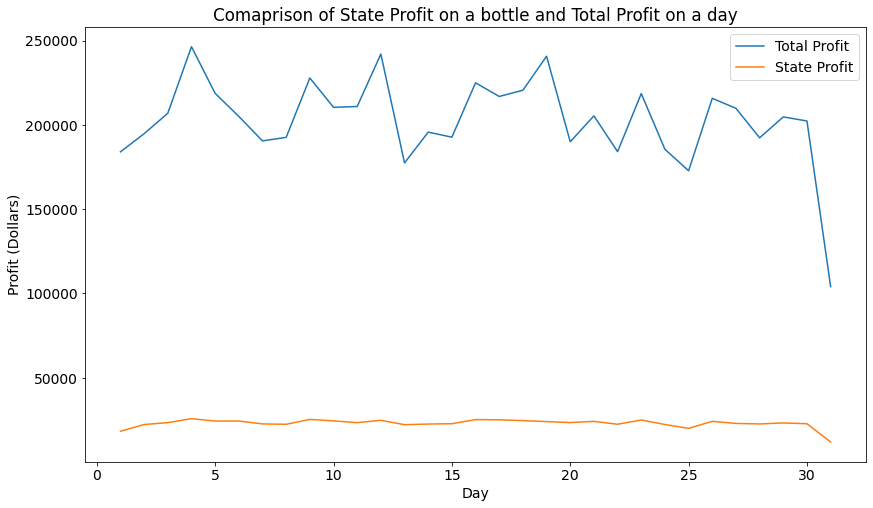

In [89]:
merged.plot(x ='Day', y = ['Total Profit', 'State Profit'],kind='line', title ='Comaprison of State Profit on a bottle and Total Profit on a day' , ylabel ='Profit (Dollars)');

Observation - The daily profit of state on all the bottle sold is 10times then the profit on one bottle sold across all stores, Also the state profit on everday basis on one bottle is constant, across the month.

## What is the Profit of State on one bottle sold across all the stores on daily basis?

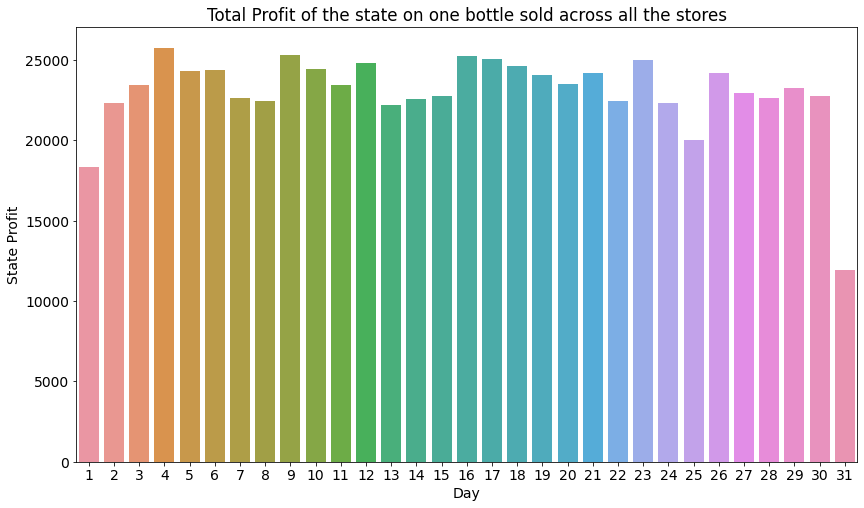

In [72]:
sns.barplot(data = daily_bottle_df,
   x='Day' , y = 'State Profit');
plt.title('Total Profit of the state on one bottle sold across all the stores');

The above graphs tells us the profit of state on one bottle at that given day.

Maximum profit - On 4 November,
Minimum profit - On 31 November.

## What is the Volume of liquor sold across the stores in Iowa?

In [73]:
df1 = sample3_df[['Day','Volume Sold (Liters)','Store Number']]

In [74]:
df1

,Day,Volume Sold (Liters),Store Number
0,20,4.50,2191
1,21,9.00,2205
2,16,0.30,3549
3,4,5.25,2513
4,17,0.30,3942
...,...,...,...
149995,30,1.00,4819
149996,16,9.00,3612
149997,19,9.00,2963
149998,31,12.00,3808


In [75]:
fig = px.bar(df1,
             hover_data = ['Store Number'],
              x='Day',
              y='Volume Sold (Liters)')
fig.update_layout(
    title ='Volume of liquor sold everyday (in Litres)',
    xaxis_title = 'Day',
    yaxis_title = 'Volume(Litres)',
    legend_title = 'Volume Sold(Litres)'
)
fig.show()

The graph shows the everyday sales of Volume of liquor in liters.
We can see that mostly the volume sold is close to 40000 liters on most of the days.

## What are the counts of bills as per stores?

In [121]:
 store_counts =df1['Store Number'].unique()
 store_df= df1['Store Number'].value_counts().rename_axis('unique_values').to_frame('counts')

In [125]:
store_df2 = pd.DataFrame(store_df).reset_index()

In [126]:
fig =px.scatter(store_df2,
            x='unique_values',
            y='counts',
            title = 'No of Bills as per Store Id');
fig.show()

The Store Number 2633, has the highest bill count of 1342 bills in November 2015

## What is the total Volume of alcohol sold by various stores throughout Iowa in November?

In [77]:
volume_df = sample3_df[['Day','Store Number', 'Volume Sold (Liters)']]
df3= pd.DataFrame(sample3_df.groupby(sample3_df['Store Number'])['Volume Sold (Liters)'].sum()).reset_index()
df3

,Store Number,Volume Sold (Liters)
0,2106,5967.15
1,2113,358.60
2,2130,3849.70
3,2132,125.25
4,2152,557.37
...,...,...
1553,9001,346.50
1554,9002,715.50
1555,9010,99.00
1556,9013,18.00


In [78]:
total_volume = df3['Volume Sold (Liters)'].sum()
total_volume

1339149.4600000002

1339149.4600 Liters is the total alcohol sold in the November Month in Iowa

In [79]:
fig = px.scatter(df3,
                 x= 'Store Number',
                 y= 'Volume Sold (Liters)',
                 title = 'Volume sold by stores across the month in Liters'
                 );
fig.show()

The Store number 2633, has sold maximum liquor ,35.27K litres of alcohol in November 2015

## Which city sells the most categories of liquor?

In [80]:
cities = pd.DataFrame(sample3_df[['City','Category Name']])
cities


,City,Category Name
0,KEOKUK,VODKA 80 PROOF
1,CLARINDA,VODKA 80 PROOF
2,FORT MADISON,VODKA 80 PROOF
3,IOWA CITY,VODKA 80 PROOF
4,TOLEDO,VODKA 80 PROOF
...,...,...
149995,ALTOONA,TEQUILA
149996,MAQUOKETA,VODKA 80 PROOF
149997,CLIVE,SPICED RUM
149998,LA PORTE CITY,VODKA 80 PROOF


In [81]:
city_df = cities.groupby(['City', 'Category Name']).size()
city_df1 =pd.DataFrame(sample3_df.groupby(sample3_df['City'])['Category Name'].nunique()).reset_index()
city_df2 =city_df1.sort_values(by =['Category Name'], ascending = False)

In [82]:
fig = px.bar(city_df2.head(20),
             title ="Top 20 Cities selling the  most category of liquor",
             y= "City",
             x= "Category Name",
             barmode='relative',
             color = "City");
fig.show()

The above graph tells us about which Cities sells most category of liquor.
The following cities sells the most category of liquors


1.   Cedar Rapids, selling 67 categories
2.   Iowa City, West Des Moines, Des Moines : selling 66 Categories each
3.   Davenport, selling 65 Categories



## Creating a treemap showing top 50 cities selling most category of liquor

In [83]:

fig = px.treemap(city_df2.head(50),
                     path=['City','Category Name'],
                 values = 'Category Name',
                 title = 'Top 50 Cities categorywise selling liquor');
fig.show()

The above graph shows the Top 50 cities in Iowa state seling most categories of liquor

## Lets plot State bottle retail and state bottle cost on a sunburst map for first 200 bills

In [84]:
fig = px.sunburst(sample3_df.head(200), 
                 path=['County', 'State Bottle Cost'], 
                 values='State Bottle Retail',
                 color='Zip Code', 
                 color_continuous_scale='RdBu');
fig.show()

**Observations**


*   Polk County has the maximum type of Categories available.
*   It has the most expensive liquor bottle, 99.0$.

*   Average Retail cost of the bottle is around 11$.   





# Conclusion



1.   Cedar Rapids, selling 67 categories
     Iowa City, West Des Moines, Des Moines : selling 66 Categories each,
     Davenport, selling 65 Categories

2.   The total volume of alcohol sold is 1339149.4600000002 liters.
3.   The state profit was maximum on 4th November with 247000(Dollars) as total Profit.
4.   There are 70 different categories of liquor constituting everyday sales in the Iowa state.


## Future work

* Find similar dataset and take new columns from it.
* Draw inferences and behaviors from the data set about alcohol consumptions.
* Visualize more columns and get more insights
* Collect samples from other months sales and then draw a conclusion on yearly sales and consumption.

## **References**

* Plotly Documentation: https://plotly.com/python/
* Vaibhav's Notebook of EDA: https://jovian.com/ghost-smith9557/advanced-data-analysis-pandas
* Aakash N S. Analyzing Tabular Data with Pandas, 2021. https://jovian.ai/aakashns/python-pandas-data-analysis
* Pandas Documentation: https://pandas.pydata.org/docs/
* Stack overflow and Geeks for Geeks.
* Interactive visualization using plotly : https://jovian.com/ghost-smith9557/interactive-visualization-plotly-4771d